# Machine Learning - Assignment 5

This week we look at regularization of linear regressions. Splitting data into training, validation and testing sets and using their errors to test for bias or variance problems

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.optimize as op
from scipy.io import loadmat

## Problem 1: Regularized Linear Regression

### Problem 1.1: Visualizing the Data

In [5]:
data = loadmat('./data/ex5data1.mat')
X, y = data["X"], data["y"].ravel()
print(X.shape)
print(y.shape)

(12, 1)
(12,)


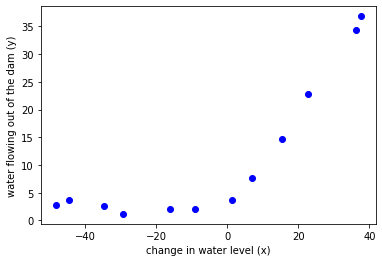

In [42]:
plt.figure()
plt.scatter(x=X, y=y, color="blue")
plt.ylabel("water flowing out of the dam (y)")
plt.xlabel("change in water level (x)")
plt.show()

### Problem 1.2: Regularized linear regression cost function

We recall the cost function for regularized linear regression -->$$𝐽(ø)={1\over{2𝑚}}∑(ℎ_ø(𝑥^{(i)})−𝑦^{(𝑖)})^2 +\frac{\lambda}{2m}\sum_{j=1}^n{\theta_j^2}$$

In [25]:
def linearRegCostFunction(theta, X, y, lam):
    h = np.dot(X,theta)
    t = np.zeros(len(theta))
    t[1:] = theta[1:]
    J = np.dot((np.dot(X,theta)-y),(np.dot(X,theta)-y))/(2*len(X))
    grad = (np.dot(X.T,(h-y))/len(X))+((t*lam)/len(X))
    return J, grad
    
def cost(theta, X, y, lam):
    h = np.dot(X,theta)
    t = np.zeros(len(theta))
    t[1:] = theta[1:]
    J = np.dot((np.dot(X,theta)-y),(np.dot(X,theta)-y))/(2*len(X))
    return J

def gradient(theta, X, y,lam):
    h = np.dot(X,theta)
    t = np.zeros(len(theta))
    t[1:] = theta[1:]
    grad = (np.dot(X.T,(h-y))/len(X))+((t*lam)/len(X))
    return grad    

In [22]:
theta = [1, 1]
lam = 1
X_train = np.column_stack((np.ones(len(X)),X))
J, grad = linearRegCostFunction(theta, X_train, y, lam)
print('Cost at theta = (1,1) is: ',J)

Cost at theta = (1,1) is:  303.9515255535976


### Problem 1.3: Regularized linear regression gradient

In [23]:
print('Gradient at theta = (1,1) is: ',grad)

Gradient at theta = (1,1) is:  [-15.30301567 598.25074417]


### Problem 1.4: Fitting linear regression

Now we compute the optimal values of $$\theta$$

In [40]:
def trainLinearReg(X, y, lam):
    initial_theta = np.zeros(X.shape[1])
    res = op.minimize(fun=cost, x0=initial_theta, args=(X_train, y,lam),
                        method='CG', jac = gradient)
    return res.x

In [41]:
lam = 0
X_train = np.column_stack((np.ones(len(X)),X))
theta_opt = trainLinearReg(X_train, y, lam)
print(theta_opt)

[13.08790351  0.36777923]


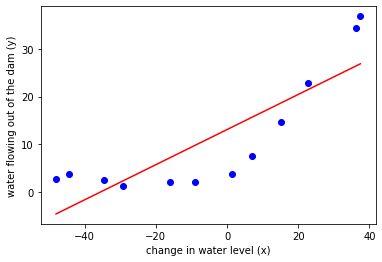

In [73]:
X_dummy=np.linspace(min(X),max(X),len(X))
X_dummy_train = np.column_stack((np.ones(len(X_dummy)),X_dummy))
h = np.dot(X_dummy_train,theta_opt)
plt.figure()
plt.scatter(x=X, y=y, color="blue")
plt.plot(X_dummy,h, color="red")
plt.ylabel("water flowing out of the dam (y)")
plt.xlabel("change in water level (x)")
plt.show()

## Problem 2: Bias-variance